In [34]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 110

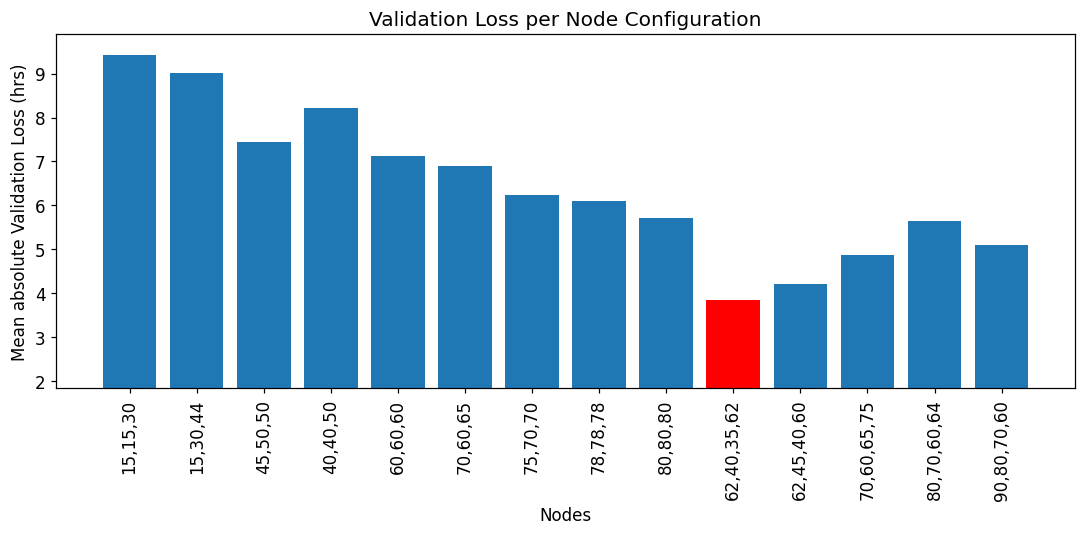

In [ ]:


# nodes combination data
nodes = ['15,15,30', '15,30,44', '45,50,50', '40,40,50', '60,60,60', '70,60,65', '75,70,70', '78,78,78', '80,80,80','62,40,35,62', '62,45,40,60', '70,60,65,75', '80,70,60,64', '90,80,70,60']
values = [9.42, 9.01, 7.45, 8.22, 7.12, 6.89, 6.23, 6.11, 5.72, 3.84, 4.21, 4.88, 5.65, 5.10]
plt.figure(figsize=(10,5))

# Find the index of the least value
min_index = values.index(min(values))

# Create the bar plot
plt.bar(nodes, values)

# Highlight the least value with a different color
plt.bar(nodes[min_index], values[min_index], color='red')  # Red for least value

# Add labels and title
plt.xlabel("Nodes")
plt.ylabel('Mean absolute Validation Loss (hrs)')
plt.title('Validation Loss per Node Configuration')


# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

# Show the least value on the y-axis
plt.ylim(bottom=min(values) - 2)  # Adjust bottom limit to show least value clearly

# Display the plot
plt.tight_layout()
plt.show()


In [36]:
import pandas as pd

df = pd.read_excel("/media/mrk/Data/E-JUST/publication/Exp_speed/Exp_speed_new/test_set.xlsx")
df.head()

,Disturbance Y/M/D (UT),CME start_time,Vp,Vlat,Vfrt,Vsw,2aw,Tobs,V1,V2,V3,V4,T1,T2,T3,T4,Tfnn,Tdbm,Vdbm
0,2000/01/22 0023,2000/01/18 1754,570,266,85.5,400,80,78.48,544,504,505,496,76.60,82.68,82.46,83.97,85.187111,80.64,449
1,2000/02/11 0258,2000/02/08 0930,630,294,94.5,510,102,65.47,607,612,604,603,68.64,68.11,69.02,69.06,63.715534,65.03,563
2,2000/02/11 2352,2000/02/10 0230,810,378,121.5,590,118,45.37,813,814,807,803,51.25,51.21,51.64,51.92,44.094547,52.07,679
3,2000/02/14 0731,2000/02/12 0431,780,364,117.0,680,136,51.00,777,835,816,824,53.61,49.93,51.09,50.56,48.806149,48.07,757
4,2001/01/23 1048,2001/01/20 2130,600,280,90.0,550,110,61.30,575,609,595,601,72.40,68.41,70.07,69.32,58.823994,63.53,586


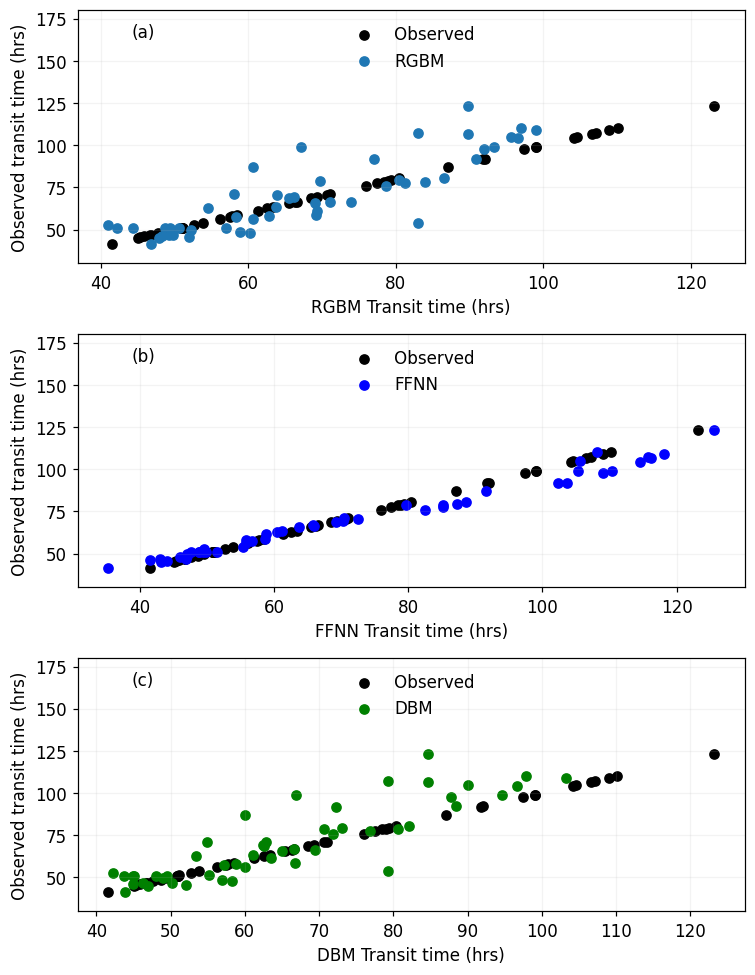

In [42]:
plt.figure(figsize =(7,9))

plt.subplot(3,1,1)
plt.scatter(df['Tobs'], df['Tobs'], label= 'Observed', c = 'black')
plt.scatter(df['T4'], df['Tobs'], label= 'RGBM')
plt.xlabel('RGBM Transit time (hrs)')
plt.ylabel('Observed transit time (hrs)')
plt.legend(frameon = False, loc='upper center')
plt.grid(True, alpha =0.15)
plt.ylim(30, 180)
plt.annotate(f"(a)", xy=(0.08, 0.95), xycoords='axes fraction', fontsize=11, ha = 'left', va= 'top')

plt.subplot(3,1,2)
plt.scatter(df['Tobs'], df['Tobs'], label= 'Observed', c = 'black')
plt.scatter(df['Tfnn'], df['Tobs'], label= 'FFNN', c='blue')
plt.xlabel('FFNN Transit time (hrs)')
plt.ylabel('Observed transit time (hrs)')
plt.legend(frameon = False, loc='upper center')
plt.ylim(30, 180)
plt.grid(True, alpha =0.15)
plt.annotate(f"(b)", xy=(0.08, 0.95), xycoords='axes fraction', fontsize=11, ha = 'left', va= 'top')

plt.subplot(3,1,3)
plt.scatter(df['Tobs'], df['Tobs'], label= 'Observed', c = 'black')
plt.scatter(df['Tdbm'], df['Tobs'], label= 'DBM', c='green')
plt.xlabel('DBM Transit time (hrs)')
plt.ylabel('Observed transit time (hrs)')
plt.legend(frameon = False, loc='upper center')
plt.grid(True, alpha =0.15)
plt.ylim(30, 180)
plt.annotate(f"(c)", xy=(0.08, 0.95), xycoords='axes fraction', fontsize=11, ha = 'left', va= 'top')

plt.tight_layout()
plt.show()




In [87]:
import pandas as pd
df = pd.read_excel("eventlist.xlsx", sheet_name='Sheet4')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CME date      286 non-null    object
 1   No of events  286 non-null    int64 
 2   Vsw           286 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.8+ KB


In [91]:
year = pd.to_datetime(df['CME date'])
evnt = df['No of events']
vsw =  df['Vsw'] 

In [92]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11
plt.rcParams['figure.dpi'] = 100

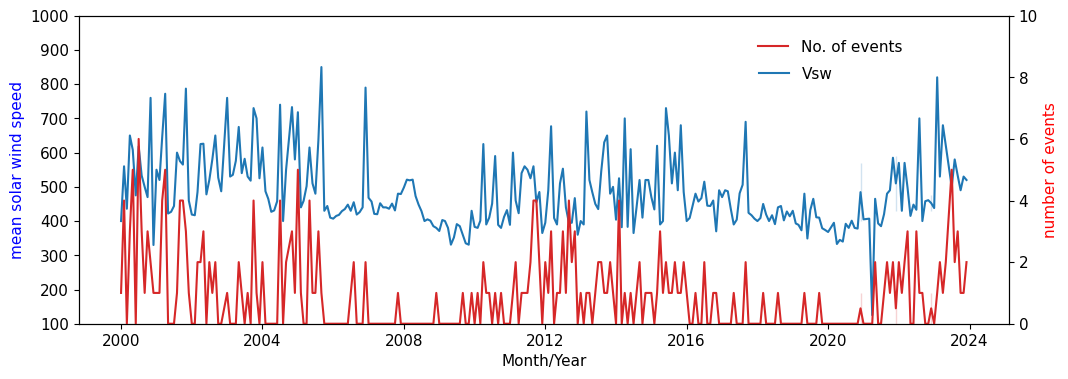

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


fig, ax1 = plt.subplots(figsize=(12, 4))
ax2 = ax1.twinx()

sns.lineplot(x=year, y=vsw, data=df, ax=ax1, color='tab:blue', label='Vsw')
sns.lineplot(x= year, y= evnt, data=df, ax=ax2, color='tab:red', label='No. of events')

ax1.set_xlabel('Month/Year')
ax1.set_ylabel('mean solar wind speed', color='blue')
ax1.set_ylim(100, 1000)
ax2.set_ylim(0, 10)
ax2.set_ylabel('number of events', color='red')
ax1.legend(loc='upper right', bbox_to_anchor=(0.825, 0.88), frameon=False)
ax2.legend(loc='lower right', bbox_to_anchor=(0.90, 0.83), frameon=False)

plt.show()